##### 搭配 OpenCV 實作攝影機拍照和錄影
這篇教學會延伸「搭配 OpenCV 實作電腦攝影機」範例，除了將 PyQt5 結合 OpenCV 讀取攝影鏡，更會實作出透過電腦鏡頭的攝影機，進行拍照和錄影的功能。

##### 範例程式說明 
修改「搭配 OpenCV 實作電腦攝影機」文章的範例，在原本 OpenCV 與 PyQt5 整合程式裡，加入兩顆按鈕，一顆設定為拍照，一顆設定為錄影，\
詳細解說在程式碼的註解中，下方列出一些重點：
* 設定兩個全域變數，當拍照或錄影事件發生時，透過變數進行管控。
* 錄影的函式可藉由變數判斷正在錄影或停止錄影。
* OpenCV 的程式放在另外的執行緒中執行，避免與視窗的程式互相干擾。
* 儲存圖片或影片時，使用 random 的函式庫產生隨機檔名。

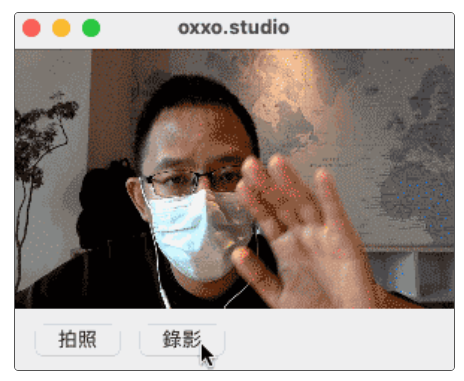

In [ ]:
from PyQt5 import QtWidgets
from PyQt5.QtGui import QImage, QPixmap
import sys, cv2, threading, random

app = QtWidgets.QApplication(sys.argv)
window_w, window_h = 300, 220               # 設定視窗長寬
scale = 0.58                                # 影片高度的比例

Form = QtWidgets.QWidget()
Form.setWindowTitle('oxxo.studio')
Form.resize(window_w, window_h)

# 視窗尺寸改變時的動作
def windowResize(self):
    global window_w, window_h, scale
    window_w = Form.width()                 # 取得視窗寬度
    window_h = Form.height()                # 取得視窗高度
    label.setGeometry(0,0,window_w,int(window_w*scale))  # 設定 QLabel 尺寸
    btn1.setGeometry(10,window_h-40,70,30)  # 設定按鈕位置
    btn2.setGeometry(80,window_h-40,200,30) # 設定按鈕位置

Form.resizeEvent = windowResize             # 視窗尺寸改變時觸發

ocv = True                                  # 啟用 OpenCV 的參考變數，預設 True
# 關閉視窗時的動作
def closeOpenCV(self):
    global ocv, output
    ocv = False                             # 關閉視窗後，設定成 False
    try:
        output.release()                    # 關閉視窗後，釋放儲存影片的資源
    except:
        pass                                # 如果沒有按下錄製影片按鈕，就略過

Form.closeEvent = closeOpenCV               # 視窗關閉時觸發

label = QtWidgets.QLabel(Form)
label.setGeometry(0,0,window_w,int(window_w*scale)) # 設定 QLabel 位置和尺寸

# 存檔時使用隨機名稱的函式
def rename():
    return str(random.random()*10).replace('.','')

photo= False                                # 按下拍照紐時的參考變數，預設 False
# 按下拍照扭的動作
def takePhoto():
    global photo
    photo = True                            # 變數設定為 True

btn1 = QtWidgets.QPushButton(Form)
btn1.setGeometry(10,window_h-40,70,30)      # 設定拍照鈕的位置和尺寸
btn1.setText('拍照')
btn1.clicked.connect(takePhoto)             # 按下按鈕觸發拍照


fourcc = cv2.VideoWriter_fourcc(*'mp4v')    # 設定存檔影片格式
recorderType = False                        # 設定是否處於錄影狀態，預設 False

# 按下錄影按鈕的動作
def recordVideo():
    global recorderType, output
    if recorderType == False:
        # 如果按下按鈕時沒有在錄影
        # 設定錄影的檔案
        output = cv2.VideoWriter(f'{rename()}.mp4', fourcc, 20.0, (window_w,int(window_w*scale)))
        recorderType = True                   # 改為 True 表示正在錄影
        btn2.setGeometry(80,window_h-40,200,30)  # 因為內容文字變多，改變尺寸
        btn2.setText('錄影中，點擊停止並存擋')
    else:
        # 如果按下按鈕時正在錄影
        output.release()                    # 釋放檔案資源
        recorderType = False                # 改為 False 表示停止錄影
        btn2.setGeometry(80,window_h-40,70,30)   # 改變尺寸
        btn2.setText('錄影')

btn2 = QtWidgets.QPushButton(Form)
btn2.setGeometry(80,window_h-40,70,30)      # 設錄影照鈕的位置和尺寸
btn2.setText('錄影')
btn2.clicked.connect(recordVideo)           # 按下按鈕觸發錄影或停止錄影

def opencv():
    global window_w, window_h, scale, photo, output, recorderType
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("Cannot open camera")
        exit()
    while ocv:
        ret, frame = cap.read()             # 讀取影格
        if not ret:
            print("Cannot receive frame")
            break
        frame = cv2.resize(frame, (window_w, int(window_w*scale)))  # 改變尺寸符合視窗
        if photo == True:
            photo = False                   # 按下拍照鈕時，會先設定 True，觸發後再設回 False
            name = rename()                 # 重新命名檔案
            cv2.imwrite(f'{name}.jpg', frame) # 儲存圖片
        if recorderType == True:
            output.write(frame)             # 按下錄影時，將檔案儲存到 output
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # 改為 RGB
        height, width, channel = frame.shape
        bytesPerline = channel * width
        img = QImage(frame, width, height, bytesPerline, QImage.Format_RGB888)
        label.setPixmap(QPixmap.fromImage(img))   # 顯示圖片

video = threading.Thread(target=opencv)     # 將 OpenCV 的部分放入 threading 裡執行
video.start()

Form.show()
sys.exit(app.exec_())

##### 其他延伸 
運用同樣的原理，可以延伸更多 OpenCV 的功能，做到調整圖片亮度或色彩後儲存，或加入更多處理影片的功能。更多參考：OpenCV 教學